### Import the dataset and using pandas_profiling for preliminary exploratory analysis

In [86]:
from pathlib import Path

import requests
import numpy as np
import pandas as pd

import pandas_profiling
from pandas_profiling.utils.cache import cache_file

import matplotlib.pyplot as plt
import seaborn as sns


import pickle
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, learning_curve

In [10]:
#Load the splited and scaled train and test datasets
with open('train_test_data_from_preprocessing.pkl', 'rb') as f: 
    X_train, X_test, y_train, y_test  = pickle.load(f)
f.close()

In [11]:
#Get train and test feature and label shapes

print(f"X train shape is {X_train.shape}")
print(f"y train shape is {y_train.shape}")

print(f"X test shape is {X_test.shape}")
print(f"y test shape is {y_test.shape}")

X train shape is (54870, 10)
y train shape is (54870,)
X test shape is (13718, 10)
y test shape is (13718,)


In [17]:
print("Train data preview:")
print(X_train[:5, :])
print(y_train[:5])

print("Test data preview:")
print(X_test[:5, :])
print(y_test[:5])


Train data preview:
[[-0.22948083 -0.18337051 -0.40078842 -0.13725273  0.91416625 -0.38890813
   0.37981711  0.31307138 -0.38953921  1.12892245]
 [-0.58359088 -0.24233624 -0.58083903 -0.87732264  0.49386857  2.44576586
  -0.2478681  -0.80560901 -0.72967457 -0.89599049]
 [ 1.00077778 -0.3525324   0.79954894 -0.13725273  2.3698781   1.59021888
  -0.05458628 -0.29300871 -0.55591917  1.83652288]
 [ 0.99996653 -0.40356378 -1.60112578 -1.19449546 -0.54385753 -0.45170678
  -0.19472722 -0.41470217 -0.61483446 -0.34453527]
 [ 1.01740837  0.10994753 -1.0009571  -1.19449546 -0.53629182 -0.42214994
   0.14819313  0.0370503  -0.51132349 -0.43135029]]
id
98172    1
3299     0
20349    1
21314    0
48512    0
Name: cardio, dtype: int64
Test data preview:
[[-0.50773913 -0.55354677 -0.40078842 -0.13725273  2.34153675  2.61211461
  -0.19730738 -0.46801081 -0.62225061 -0.05246727]
 [ 0.12990233 -0.60880206 -0.40078842 -0.13725273 -0.5657923  -0.47902721
  -0.18149661 -0.43039188 -0.68537316  1.3845591 ]


### Model 1: Regularized Logistical Regression (Lasso, Ridge Regression and Elastic Net)

In [27]:
#grid search:
#the grid of parameters to search over
from sklearn.linear_model import LogisticRegression
Cs = [0.001,0.01,0.1,1,10,100]
penalty = ['l1', 'l2', 'elasticnet']
#select sage as it works for all three type of penalties and is more efficient for large dataset
solver = ['saga'] 
#l1 ratio specific for elasticnet
l1_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

grid_params = {
        'C': Cs,
        'penalty': penalty,
        'solver': solver,
        'l1_ratio': l1_ratio
    
}

'''
#should I scale train and cv data separaly for Cross Validation???
'''

#grid search on the training dataset
lr_model = LogisticRegression()
lr_grid_cv = GridSearchCV(lr_model, param_grid=grid_params, cv=5, n_jobs=-1)
lr_grid_cv.fit(X_train, y_train)

/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-

/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-

/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-

/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-

/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-

/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-

/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-

/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/root/anaconda3/lib/python3.8/site-

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga']})

In [84]:
#get the best parameters from Logistic regression
print(f"The best setting from grid search is {lr_grid_cv.best_params_}")

The best setting from grid search is {'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}


In [34]:
#using best setting to fit and cv on train data, predict on test data, to obtain confusion matrix and ROC curves
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
lr_best_cv_results = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, cv=5, scoring=scoring)
print(f"Precision of the cv results is {lr_best_cv_results['test_precision_macro']}")
print(f"Recall of the cv results is {lr_best_cv_results['test_recall_macro']}")

Precision of the cv results is [0.72710432 0.7304374  0.7270003  0.73010438 0.73172602]
Recall of the cv results is [0.72387327 0.72754839 0.72348782 0.72649139 0.72782926]


In [37]:
#prediction on test dataset
from sklearn.metrics import confusion_matrix

lr_best = lr_grid_cv.best_estimator_

lr_best.fit(X_train, y_train)

y_pred_lr  = lr_best.predict(X_test)




cnf_matrix= confusion_matrix(y_test,y_pred_lr)
print(f"With Elestic Net, the confusion matrix is:\n{cnf_matrix}")
Accuracy_lr=lr_best.score(X_test,y_test)

print(f"The overall accuracy of Elestic Net is {Accuracy_lr}")

With Elestic Net, the confusion matrix is:
[[5551 1445]
 [2240 4482]]
The overall accuracy of Elestic Net is 0.7313748359819215


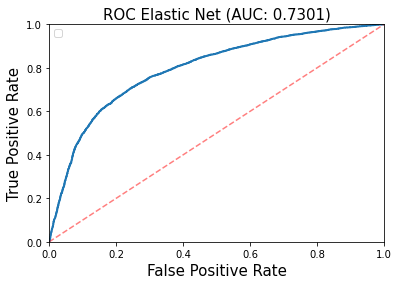

In [83]:
#Plot ROC curve and AUC score
from sklearn.metrics import roc_auc_score, RocCurveDisplay

auc_score = roc_auc_score(y_test, y_pred_lr)

RocCurveDisplay.from_estimator(lr_best, X_test, y_test, pos_label=1, linewidth=2.0)
plt.legend('')
plt.xlabel("False Positive Rate", size=15)
plt.ylabel("True Positive Rate", size=15)
plt.title(f"ROC Elastic Net (AUC: {round(auc_score, 4)})", size=15)
plt.plot([0, 1], [0, 1],'r--', alpha=0.5)
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()



### Model 2 Support Vector Machine

In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

'''
What is the best hyperparameter tuning strategy for SVC taking into consideration of computational speed 
'''
grid_params = [
    {"kernel": ["rbf"], "gamma": [1e-4, 1e-3, 1e-2, 1e-1, 0, 1, 10, 'scale', 'auto'], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

#Randomized search (witn n-iter=10) on the training dataset
svc_model = SVC()
svc_grid_cv = RandomizedSearchCV(svc_model, param_distributions=grid_params, cv=5, n_jobs=-1, verbose=1)
svc_grid_cv.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions=[{'C': [1, 10, 100, 1000],
                                         'gamma': [0.0001, 0.001, 0.01, 0.1, 0,
                                                   1, 10, 'scale', 'auto'],
                                         'kernel': ['rbf']},
                                        {'C': [1, 10, 100, 1000],
                                         'kernel': ['linear']}],
                   verbose=1)

In [91]:
#get the best parameters from Logistic regression
print(f"The best setting from random search for SVC is {svc_grid_cv.best_params_}")

The best setting from random search for SVC is {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}


In [92]:
scoring = ['precision_macro', 'recall_macro']
svc_best_cv_results = cross_validate(svc_grid_cv.best_estimator_, X_train, y_train, cv=5, scoring=scoring)
print(f"Precision of the cv results is {svc_best_cv_results['test_precision_macro']}")
print(f"Recall of the cv results is {svc_best_cv_results['test_recall_macro']}")

Precision of the cv results is [0.73232922 0.7362688  0.73261309 0.73248552 0.73957241]
Recall of the cv results is [0.72877638 0.73318952 0.72934409 0.72955177 0.73557768]


In [97]:
#prediction on test dataset
from sklearn.metrics import confusion_matrix

svc_best = svc_grid_cv.best_estimator_

svc_best.fit(X_train, y_train)

y_pred_svc  = svc_best.predict(X_test)




cnf_matrix= confusion_matrix(y_test,y_pred_svc)
print(f"With SVC, the confusion matrix is:\n{cnf_matrix}")
Accuracy_svc=svc_best.score(X_test,y_test)

print(f"The overall accuracy of SVC is {Accuracy_svc}")

With SVC, the confusion matrix is:
[[5599 1397]
 [2220 4502]]
The overall accuracy of SVC is 0.7363318267969091


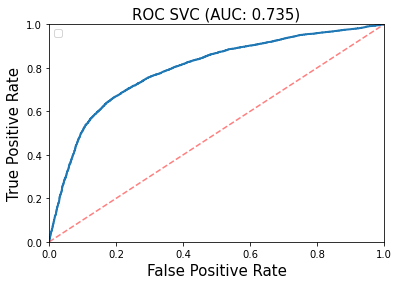

In [98]:
#Plot ROC curve and AUC score
from sklearn.metrics import roc_auc_score, RocCurveDisplay

auc_score = roc_auc_score(y_test, y_pred_svc)

RocCurveDisplay.from_estimator(svc_best, X_test, y_test, pos_label=1, linewidth=2.0)
plt.legend('')
plt.xlabel("False Positive Rate", size=15)
plt.ylabel("True Positive Rate", size=15)
plt.title(f"ROC SVC (AUC: {round(auc_score, 4)})", size=15)
plt.plot([0, 1], [0, 1],'r--', alpha=0.5)
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()

### Model 3 Random Forest Classification

In [112]:
'''
How to determine the range and which parameters to tune?
How Baysian Optimizer can be uniformly applied to different target functions (non-parametric???)
How can I use BO if the hyperparameter is not numeric (such as criterion)?
How to determine number n_iter and init_points in BO???
'''
#try baysian optimizer for hyperparameter tuning
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from bayes_opt import BayesianOptimization

n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
max_depth = np.linspace(2, 32, 16, endpoint=True)

grid_params = {
        'n_estimators': n_est,
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': max_depth,
        'criterion': ['gini', 'entropy']
}



In [151]:
def rf_eval(n_estimator, max_feature, max_depth):

    
    rf = RandomForestClassifier(n_estimators=int(n_estimator), max_features = int(max_feature), criterion='entropy',
                               max_depth = int(max_depth), n_jobs=-1, random_state=42, verbose=0)
    
    cv_score = cross_validate(rf, X_train, y_train, cv=5)
    
    return np.mean(cv_score['test_score'])

In [152]:
rfBO = BayesianOptimization(rf_eval, {'n_estimator': (10, 1000),
                                                'max_feature': (1,10),
                                                'max_depth': (1,10)
                                                })

rfBO.maximize(n_iter=10, init_points=2)

|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
|  1        |  0.7127   |  2.345    |  5.286    |  90.87    |
|  2        |  0.7309   |  6.637    |  8.654    |  191.2    |
|  3        |  0.7308   |  6.418    |  7.596    |  190.4    |
|  4        |  0.7225   |  4.503    |  1.031    |  289.3    |
|  5        |  0.7307   |  6.203    |  9.346    |  999.8    |
|  6        |  0.728    |  6.277    |  2.348    |  921.9    |
|  7        |  0.7309   |  7.934    |  9.25     |  796.8    |
|  8        |  0.7126   |  1.37     |  4.638    |  717.9    |
|  9        |  0.7297   |  5.543    |  9.665    |  849.5    |
|  10       |  0.731    |  8.526    |  9.775    |  487.9    |
|  11       |  0.7283   |  9.24     |  1.605    |  554.2    |
|  12       |  0.7127   |  1.802    |  3.18     |  420.1    |


In [156]:
#get the best parameters
rfBO.max

{'target': 0.7310005467468562,
 'params': {'max_depth': 8.526056279656089,
  'max_feature': 9.775384003860621,
  'n_estimator': 487.9398870689869}}

In [159]:
rf_best = RandomForestClassifier(n_estimators=int(rfBO.max['params']['n_estimator']), \
max_features = int(rfBO.max['params']['max_feature']), criterion='entropy',
                               max_depth = int(rfBO.max['params']['max_depth']), n_jobs=-1, random_state=42, verbose=0)


scoring = ['precision_macro', 'recall_macro']
svc_best_cv_results = cross_validate(rf_best, X_train, y_train, cv=5, scoring=scoring)
print(f"Precision of the cv results is {svc_best_cv_results['test_precision_macro']}")
print(f"Recall of the cv results is {svc_best_cv_results['test_recall_macro']}")

Precision of the cv results is [0.73039959 0.73352947 0.73091282 0.73073982 0.73745173]
Recall of the cv results is [0.72784943 0.73195335 0.72930533 0.72922392 0.73486064]


In [160]:

rf_best.fit(X_train, y_train)

y_pred_rf  = rf_best.predict(X_test)



cnf_matrix= confusion_matrix(y_test,y_pred_svc)
print(f"With SVC, the confusion matrix is:\n{cnf_matrix}")
Accuracy_svc=svc_best.score(X_test,y_test)

print(f"The overall accuracy of SVC is {Accuracy_svc}")

With SVC, the confusion matrix is:
[[5599 1397]
 [2220 4502]]
The overall accuracy of SVC is 0.7363318267969091


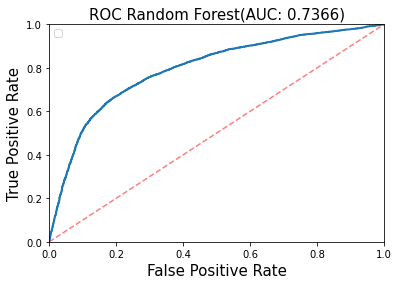

In [158]:
auc_score = roc_auc_score(y_test, y_pred_rf)

RocCurveDisplay.from_estimator(svc_best, X_test, y_test, pos_label=1, linewidth=2.0)
plt.legend('')
plt.xlabel("False Positive Rate", size=15)
plt.ylabel("True Positive Rate", size=15)
plt.title(f"ROC Random Forest(AUC: {round(auc_score, 4)})", size=15)
plt.plot([0, 1], [0, 1],'r--', alpha=0.5)
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()

### Two papers that works on the same dataset:
<b>[Paper1](https://ieeexplore.ieee.org/abstract/document/8985205?casa_token=KovNNmBsIWYAAAAA:rU6M85lyhYeFq4E76sMzu-S-AHJpHLyMjQxQw6dOJSV8pqMXLJnbZXguZOotYLOvymbuR9NI): 73% accurary with 65% specificity and 80% sensitivity<br>[Paper2](http://www.ijcst.com/vol22/2/milan.pdf) 84% for SVM?????</b>